In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [6]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [12]:
boston = pd.DataFrame(boston_dataset.data,columns= boston_dataset.feature_names)
boston.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston['MEDV'] = boston_dataset.target

In [19]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

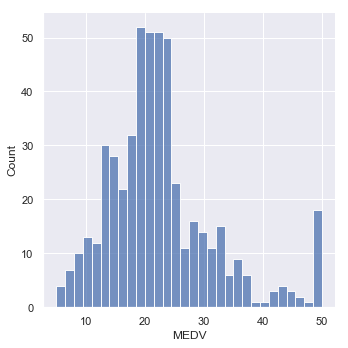

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(boston['MEDV'],bins = 30,palette="Blues_r")
plt.show()

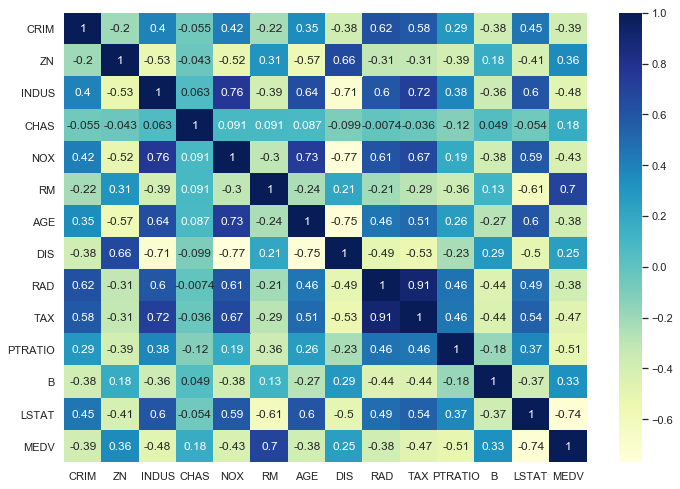

In [42]:

sns.heatmap(boston.corr(),annot = True,cmap="YlGnBu")


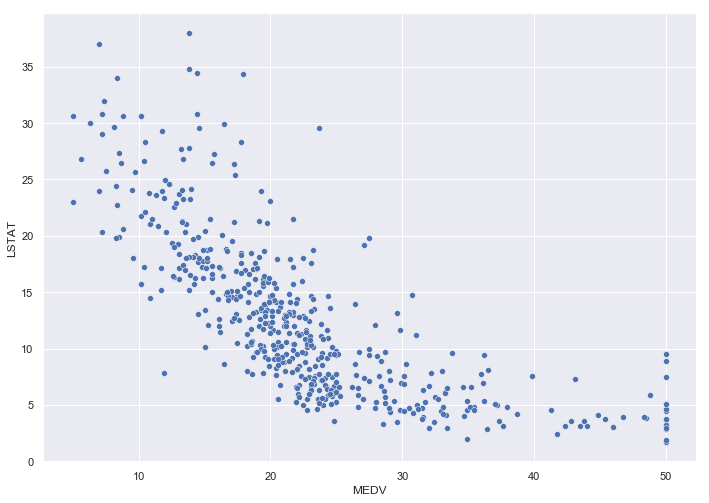

In [43]:
sns.scatterplot(boston['MEDV'],boston['LSTAT'])

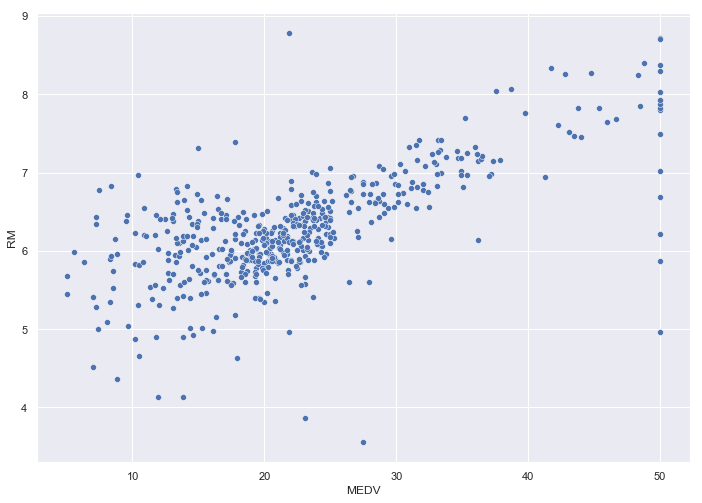

In [44]:
sns.scatterplot(boston['MEDV'],boston['RM'])

In [48]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)


In [52]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
predictions = lm.predict(X_test)
rmse  = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2 = metrics.r2_score(y_test,predictions)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


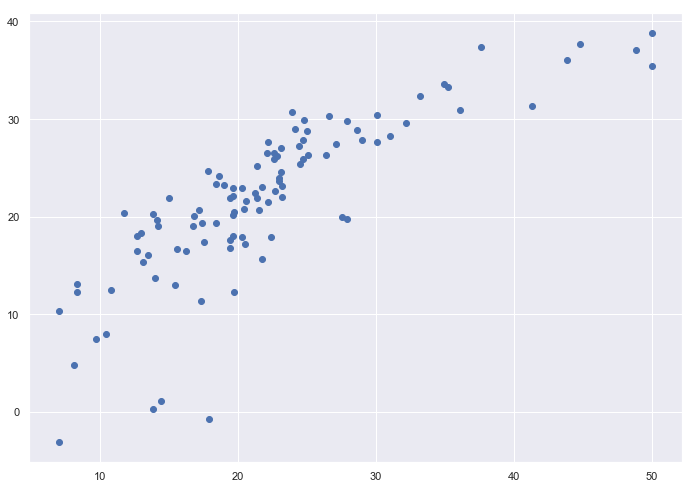

In [55]:
plt.scatter(y_test,predictions)

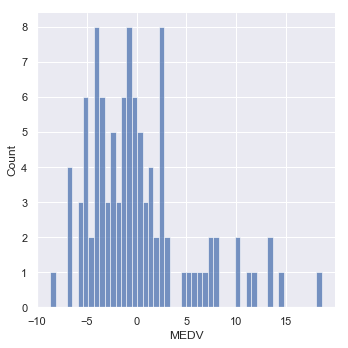

In [56]:
sns.displot((y_test-predictions),bins = 50)